In [ ]:
%matplotlib inline

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/model/ml_rgr.ipynb)

[![View Source on GitHub](https://img.shields.io/badge/github-view%20source-black.svg)](https://github.com/AtrCheema/ai4water_examples/blob/master/docs/source/_notebooks/model/ml_rgr.ipynb)

# Building Machine learning models for regression


In [ ]:
try:
    import ai4water
except (ImportError, ModuleNotFoundError):
    !pip install ai4water[ml]

In [1]:

from ai4water import Model
from ai4water.utils.utils import get_version_info


for k,v in get_version_info().items():
    print(f"{k} version: {v}")

D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


python version: 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:16) [MSC v.1916 64 bit (AMD64)]
os version: nt
ai4water version: 1.06
lightgbm version: 3.3.1
tcn version: 3.4.0
catboost version: 0.26
xgboost version: 1.5.0
easy_mpl version: 0.21.2
SeqMetrics version: 1.3.3
tensorflow version: 2.7.0
keras.api._v2.keras version: 2.7.0
numpy version: 1.21.0
pandas version: 1.3.4
matplotlib version: 3.4.3
h5py version: 3.5.0
sklearn version: 1.0.1
shapefile version: 2.3.0
xarray version: 0.20.1
netCDF4 version: 1.5.7
optuna version: 2.10.1
skopt version: 0.9.0
hyperopt version: 0.2.7
plotly version: 5.3.1
lime version: NotDefined
seaborn version: 0.11.2


In [2]:
model = Model(model="RandomForestRegressor")


            building ML model for  
            regression problem using RandomForestRegressor


In [3]:
model = Model(model={"RandomForestRegressor": {"n_estimators": 200}})


            building ML model for  
            regression problem using RandomForestRegressor


In [4]:
model = Model(model={"XGBRegressor": {"learning_rate": 0.01}})


            building ML model for  
            regression problem using XGBRegressor


In [5]:
model = Model(model={"CatBoostRegressor": {"learning_rate": 0.01}})


            building ML model for  
            regression problem using CatBoostRegressor


In [6]:
model = Model(model={"LGBMRegressor": {"num_leaves": 45}})


            building ML model for  
            regression problem using LGBMRegressor


In [7]:
model._model

LGBMRegressor(num_leaves=45, random_state=313)

## Custom model/estimator/algorithm



### uninitiated

In [9]:
from sklearn.ensemble import RandomForestRegressor

class MyRF(RandomForestRegressor):
    pass


model = Model(model=MyRF,
              ts_args={'lookback': 1},
              mode="regression")


            building ML model for  
            regression problem using <class '__main__.MyRF'>


### uninitiated with arguments

In [10]:
model = Model(model={MyRF: {"n_estimators": 10}},
              ts_args={'lookback': 1},
              mode="regression")


            building ML model for  
            regression problem using <class '__main__.MyRF'>


### initiated

In [ ]:
model = Model(model=MyRF(), mode="regression")

## Training

In [13]:
from ai4water.datasets import MtropicsLaos

dataset = MtropicsLaos(save_as_nc=True,  # if set to True, then netcdf must be installed
                       convert_to_csv=False,
                       path="F:\\data\\MtropicsLaos",
                      )

data = dataset.make_regression(lookback_steps=1)
data.shape


    Not downloading the data since the directory 
    F:\data\MtropicsLaos already exists.
    Use overwrite=True to remove previously saved files and download again


Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.


(258, 9)

In [14]:
model = Model(model="RandomForestRegressor")
model.fit(data=data)


            building ML model for  
            regression problem using RandomForestRegressor
***** Training *****
input_x shape:  (144, 8)
target shape:  (144, 1)


RandomForestRegressor(random_state=313)

***** Test *****
input_x shape:  (78, 8)
target shape:  (78, 1)


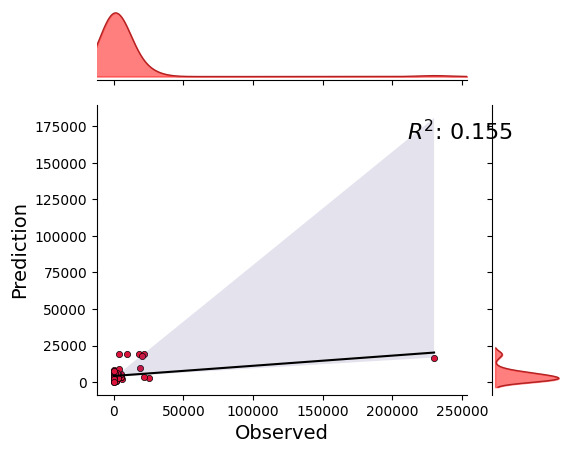

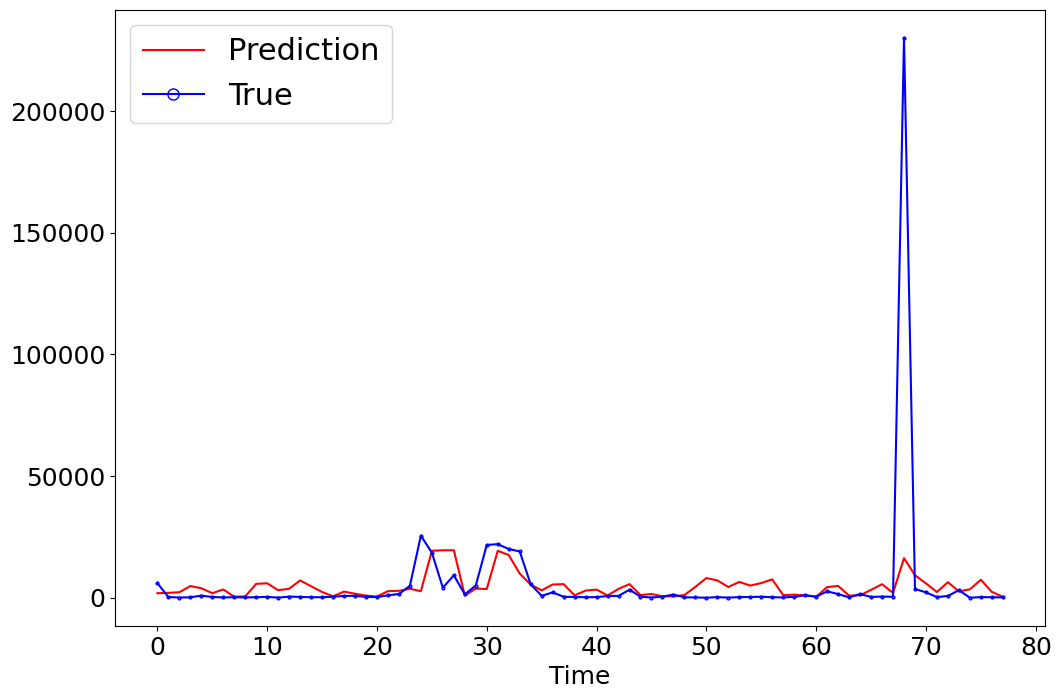

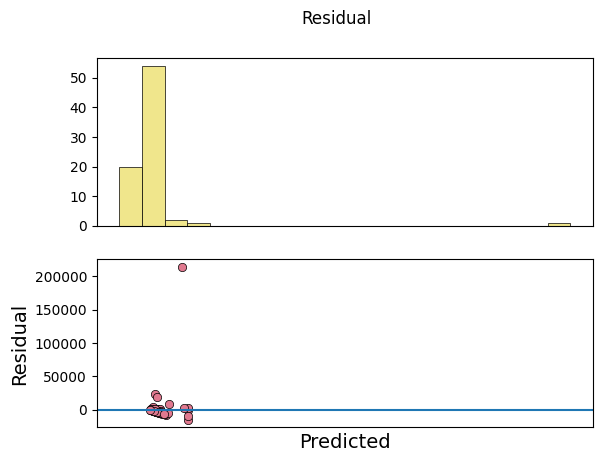

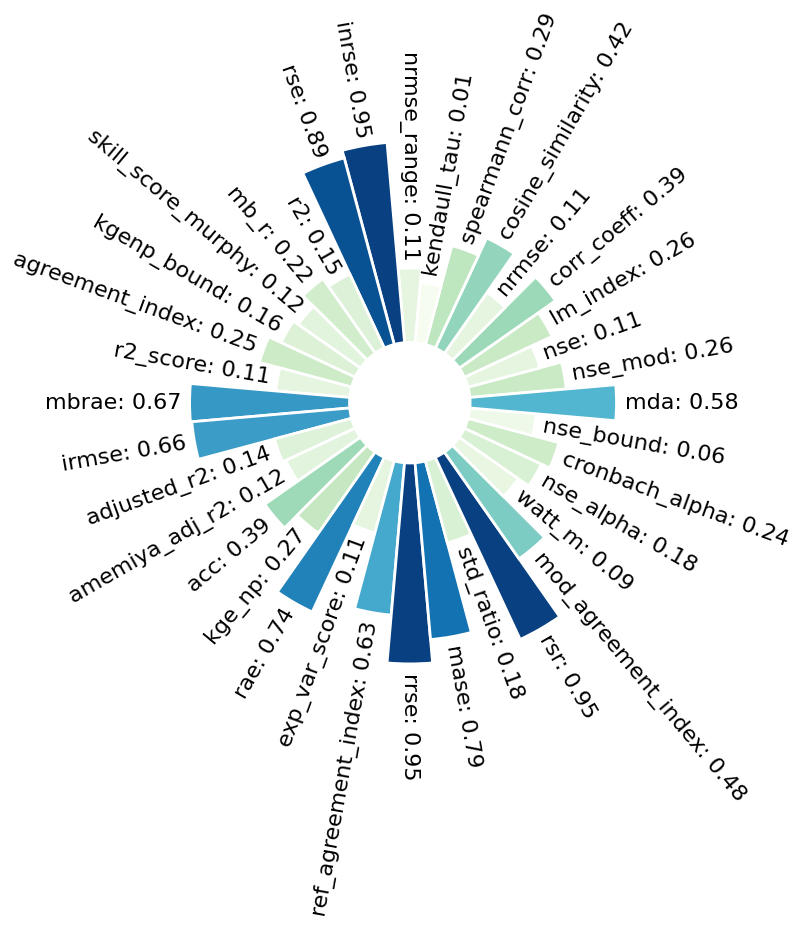

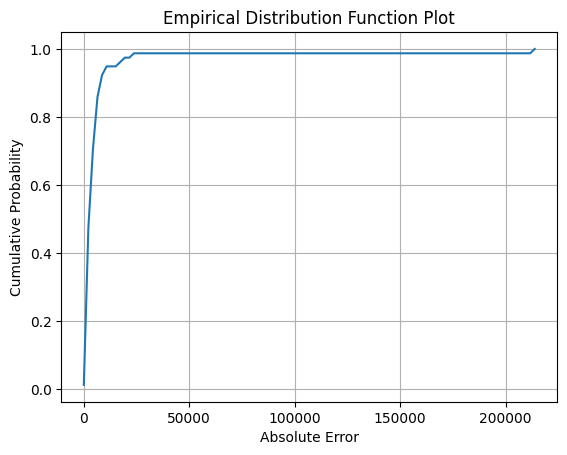

In [16]:
_ = model.predict(data=data)

In [17]:
_ = model.predict(data=data, process_results=False)

***** Test *****
input_x shape:  (78, 8)
target shape:  (78, 1)


***** Test *****
input_x shape:  (78, 8)
target shape:  (78, 1)


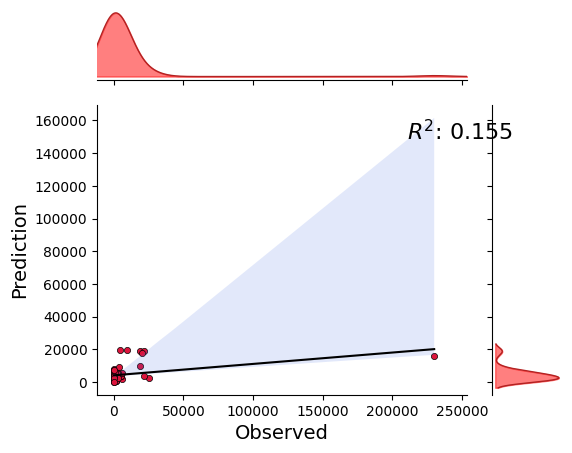

In [18]:
_ = model.predict(data=data, plots=["regression"])

In [19]:
t,p = model.predict(data=data, process_results=False, return_true=True)
t.shape, p.shape

***** Test *****
input_x shape:  (78, 8)
target shape:  (78, 1)


((78, 1), (78,))

***** Training *****
input_x shape:  (144, 8)
target shape:  (144, 1)


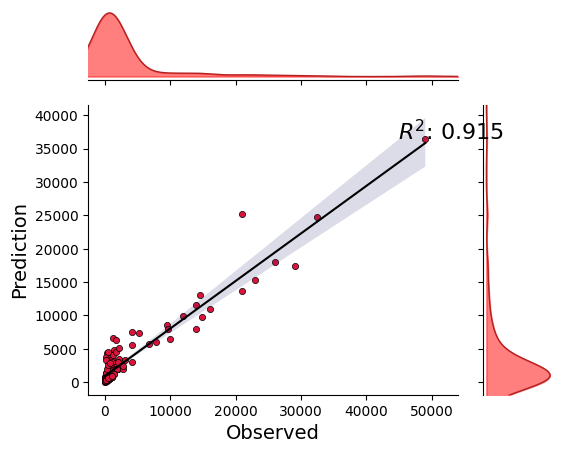

In [21]:
_ = model.predict_on_training_data(data=data, plots=["regression"])